In [1]:
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, y = make_circles(n_samples=500, factor=0.5, noise=0.1)

In [3]:
y

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,

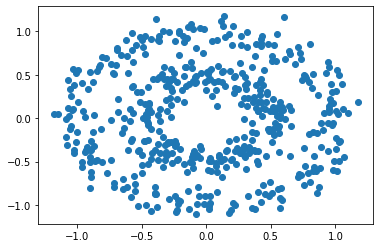

In [4]:
plt.scatter(x[:, 0], x [:, 1])
plt.show()

### Ahora creamos los objetos (clases) de nuestra red neuronal y los métodos que contendrá

In [7]:
class NeuralLayer:
    def __init__(self, n_perceptrons, edges, activation_functions):
        self.n_perceptrons = n_perceptrons
        self.edges = edges
        self.activation_functions = activation_functions
        # Para facilitar la inicialización de la capa, generaremos aleatoriamente los valores de peso y pendiente
        self.weights = np.random.rand(edges, n_perceptrons) * 2 - 1
        self.slopes = np.random.rand(1, n_perceptrons) * 2 - 1
        np.random.rand

    def set_slopes(self, slopes):
        self.slopes = slopes

    def get_slopes(self):
        return self.slopes


### Ahora definimos la función de activación

In [6]:
# Para este cometido utilizaremos la función Sigmoidea --> (1 / 1 + e ^ -x)
# Función anónima --> lambda parameter_1, parameter_n: parameter_1 + parameter_n
sigmoide =(
    lambda x: 1.0 / (1.0 + np.e ** (-x)), # Se usará en el FastForward/ForwardPass
    lambda x: x * (1.0 - x)               # Se usará en el Backpropagation
)

### Definir la Topología de nuestra red

In [27]:
parameters = 2
output =  1
topology = [parameters, 3, 4, 2, output]

### Inicializamos la red neuronal

In [33]:
def get_neural_network(topology, activation_functions):
    neural_network = []
    for index, layer in enumerate(topology[:-1]):
        neural_network.append(NeuralLayer(
            edges=topology[index + 1],
            n_perceptrons=topology[index],
            activation_functions=activation_functions
        ))
    return neural_network

### Definir la función de pérdida

In [34]:
sqr_mean_error = (
    lambda predicted_y, real_y: np.mean((predicted_y - real_y) ** 2), # ForwardPass
    lambda predicted_y, real_y: predicted_y - real_y                  # Backpropagation
)

### Ahora toca entonces entrenar nuestra red

In [38]:
def fit(x, y, neural_network, loss_function, learning_rate=0.5):
    # Definir una estructura que almacene los valores de salida
    #           0    1
    output = [(None, x)]
    for index, layer in enumerate(neural_network):
        # Definimos el forward pass
        # Realizamos lo que se denomina la unión sumadora (multiplicación matricial)
        # (n, m) (m, o) --> (500, 2) x (2, 15)
        print(neural_network[index])
        weigth_sum = output[-1][1] @ neural_network[index].weights + neural_network[index].slopes
        # Pasamos los valores calculados a la función de activación
        # sigmoide[0](weigth_sum)
        activated = np.vectorize(neural_network[index].activation_functions[0])(weigth_sum)
        output.append((weigth_sum, activated))
    # Definimos el Backpropagation
    deltas = []
    for position in reversed(range(0, len(neural_network))):
        activated = output[position + 1][1]
        if position == len(neural_network) - 1:
            deltas.insert(0, loss_function[1](activated, y) * neural_network[position].activation_functions[1](activated))
        else:
            deltas.insert(0, deltas[0] @ weight_temp.T * neural_network[position].activation_functions[1](activated))
        weight_temp = neural_network[position].weights
        # Ahora aplcicamos la técnica de la gradiente de descenso, para transmitir el error a los pesos
        neural_network[position].weights = neural_network[position].weights - output[position][1].T @ deltas[0] * learning_rate
        neural_network[position].slopes = neural_network[position].slopes - np.mean(deltas[0], axis=0, keepdims=True) * learning_rate
    return output[-1][1]

In [39]:
net = get_neural_network(topology, sigmoide)

In [40]:
import time
from IPython.display import clear_output
loss = []
y =  y[:, np.newaxis]
y_predicted = None
for index in range(1500):
    y_predicted = fit(net, x, y, sqr_mean_error, learning_rate=0.15)
    if index % 25 == 0:
        loss.append(sqr_mean_error[0](y_predicted, y))
        res = 50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _Y = np.zeros((res, res))
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = fit(net, np.array([[x0, x1]]), y, sqr_mean_error, use_train=False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(x[y[:, 0] == 0, 0], x[y[:,0] == 0, 1], c="skyblue")
        plt.scatter(x[y[:, 0] == 1, 0], x[y[:,0] == 1, 1], c="salmon")

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)
print(y_predicted)

[[[[[[[0]]]]]]]


AttributeError: 'numpy.ndarray' object has no attribute 'weights'